### **Recursive Feature Elimination (RFE) คือเทคนิคเลือกคุณสมบัติเพื่อลดจำนวนของ Feature ในชุดข้อมูล**

### **ประโยชน์ : ลด Overfitting และทำให้โมเดลตีความได้ง่ายขึ้น**

### **1.Import Libary**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### **2.โหลด Dataset**

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### **3.กำหนดตัวแปรอิสระ (x) และตัวแปรตาม (y)**

In [6]:
x=pd.DataFrame(data=wine.data,columns=wine.feature_names)
y=pd.Series(data=wine.target)

In [7]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
x.shape, y.shape

((178, 13), (178,))

In [13]:
y.value_counts() #นับจำนวนข้อมูลในแต่ละคลาส

,count
1,71
0,59
2,48


### **4.แบ่งข้อมูล train และ test**

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7,stratify=y)

### **5.นำเข้า LinearSVC สำหรับ RFE**

In [17]:
from sklearn.svm import LinearSVC #ให้ค่าสัมประสิทธิ์ (Coefficeints) ที่สามารถใช้เป็นเกณฑ์วัดความสำคัญของ Feature และ Model ทำงานเร็ว
from sklearn.feature_selection import RFE, RFECV  #RFE ใช้ลบ Feature ที่สำคัญน้อยออก / RFECV (CV=Cross-Validation) เพื่อหาจำนวน Feature ที่เหมาะสมที่สุด

### **6.สร้างและฝึกโมเดล RFE model**

In [19]:
model = LinearSVC(random_state=7, max_iter=2000)
rfe = RFE(estimator=model, n_features_to_select=5, step=1)
#เก็บ Feature เหลือ 5 ตัว
rfe.fit(x_train, y_train)

RFE(estimator=LinearSVC(max_iter=2000, random_state=7), n_features_to_select=5)

### **7.ตรวจสอบ SupportMask**

In [20]:
rfe.support_

array([False, False, False, False, False, False,  True,  True, False,
        True,  True,  True, False])

### **8.Ranking Feature**

In [22]:
rfe.ranking_ #1 สำคัญสุด -> ค่าสูงขึ้นสำคัญน้อยลง

array([6, 7, 2, 4, 8, 5, 1, 1, 3, 1, 1, 1, 9])

### **9.แสดงชื่อ Feature ที่ถูกเลือก**

In [23]:
x.columns[rfe.support_]

Index(['flavanoids', 'nonflavanoid_phenols', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines'],
      dtype='object')

### **10.สร้างและฝึก RFECV Model**

In [24]:
model2 = LinearSVC(random_state=7, max_iter=2000)
rfecv = RFECV(estimator=model2, step=1, cv=5, scoring='accuracy')
rfecv.fit(x_train, y_train)

RFECV(cv=5, estimator=LinearSVC(max_iter=2000, random_state=7),
      scoring='accuracy')

In [28]:
rfecv.n_features_ #แสดงจำนวน Feature ที่เหมาะสมที่สุด

np.int64(13)

In [29]:
x.columns[rfecv.support_] #แสดงชื่อ Feature ที่เหมาะสมที่สุด

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

### **11.แสดงกราฟ Cross-Validation Score สำหรับแต่ละ Feature**

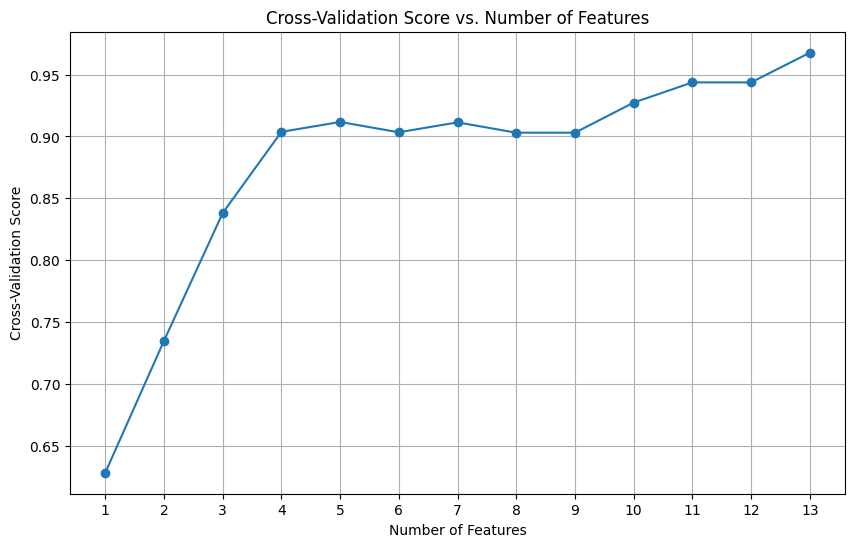

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xticks(range(1, len(rfecv.cv_results_['mean_test_score']) + 1))
plt.title('Cross-Validation Score vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
plt.show()